# HW01: Getting started with a dataset

In [56]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
!ls

01-getting-started.ipynb           Person Course Deidentification.pdf
HMXPC13_DI_v2_5-14-14.csv          Person Course Documentation.pdf


In [4]:
!head HMXPC13_DI_v2_5-14-14.csv

In [5]:
df = pd.read_csv('HMXPC13_DI_v2_5-14-14.csv')
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [6]:
len(df)

641138

In [7]:
cid = df['course_id'].str.split('/', expand=True)
cid.head()

,0,1,2
0,HarvardX,CB22x,2013_Spring
1,HarvardX,CS50x,2012
2,HarvardX,CB22x,2013_Spring
3,HarvardX,CS50x,2012
4,HarvardX,ER22x,2013_Spring


In [8]:
df[['univ', 'course', 'smstr']] = cid
cols = list(df.columns)
df = df[cols[-3:] + cols[1:-3]]
df.head()

,univ,course,smstr,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX,CB22x,2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,...,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX,CS50x,2012,MHxPC130442623,1,1,0,0,United States,NaN,...,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX,CB22x,2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,...,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX,CS50x,2012,MHxPC130275857,1,0,0,0,United States,NaN,...,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX,ER22x,2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,...,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [41]:
df['grade'] = pd.to_numeric(df['grade'], 'coerce')

## Most popular courses

In [9]:
df.groupby(['course', 'smstr']).size().sort_values(ascending=False)

course  smstr      
CS50x   2012           169621
6.00x   2012_Fall       66731
        2013_Spring     57715
ER22x   2013_Spring     57406
PH207x  2012_Fall       41592
6.002x  2012_Fall       40811
PH278x  2013_Spring     39602
8.02x   2013_Spring     31048
CB22x   2013_Spring     30002
14.73x  2013_Spring     27870
6.002x  2013_Spring     22235
7.00x   2013_Spring     21009
3.091x  2012_Fall       14215
8.MReV  2013_Summer      9477
3.091x  2013_Spring      6139
2.01x   2013_Spring      5665
dtype: int64

## Courses with the highest certification rate

In [65]:
df[['course', 'smstr', 'certified']].groupby(['course', 'smstr']).mean().sort_values('certified', ascending=False)

,,certified
course,smstr,
14.73x,2013_Spring,0.074812
3.091x,2012_Fall,0.044460
PH207x,2012_Fall,0.044287
2.01x,2013_Spring,0.043601
6.002x,2012_Fall,0.042881
ER22x,2013_Spring,0.040867
7.00x,2013_Spring,0.039174
6.00x,2012_Fall,0.037119
8.MReV,2013_Summer,0.031339


## Trying to find myself

I took 8.02x, 3.091x, and 6.00x during the dataset time period and got certificates for all three classes.

I also signed up for a couple other classes but didn't finish.

I'm going to try to find my own ID!

In [42]:
my_classes = ((df['course'] == '8.02x')
              | ((df['course'] == '3.091x') & (df['smstr'] == '2012_Fall'))
              | ((df['course'] == '6.00x') & (df['smstr'] == '2012_Fall')))
my_certifications = ((df['registered'] == 1)
                     & (df['viewed'] == 1)
                     & (df['explored'] == 1)
                     & (df['certified'] == 1))
my_demographics = (
    ((df['LoE_DI'] == 'Less than Secondary') | (df['LoE_DI'] == 'Secondary'))
    & (df['YoB'] == 1995)
    & (df['gender'] == 'm'))

me = df[my_classes & my_certifications & my_demographics]
me.head()

,univ,course,smstr,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
379019,MITx,6.00x,2012_Fall,MHxPC130248691,1,1,1,1,Canada,Less than Secondary,...,0.87,2012-07-24,2013-04-09,6680.0,83.0,669.0,16.0,0,NaN,NaN
380894,MITx,3.091x,2012_Fall,MHxPC130519343,1,1,1,1,United States,Less than Secondary,...,0.72,2012-07-25,2013-01-28,2812.0,48.0,193.0,14.0,0,NaN,NaN
383470,MITx,6.00x,2012_Fall,MHxPC130362123,1,1,1,1,United States,Secondary,...,0.85,2012-07-27,2013-02-19,10194.0,99.0,334.0,18.0,0,NaN,NaN
386663,MITx,6.00x,2012_Fall,MHxPC130513927,1,1,1,1,Poland,Less than Secondary,...,0.94,2012-07-30,2013-02-04,9959.0,91.0,994.0,18.0,0,NaN,NaN
389011,MITx,8.02x,2013_Spring,MHxPC130596415,1,1,1,1,Other South America,Secondary,...,0.89,2013-01-18,2013-08-31,12517.0,130.0,1658.0,21.0,0,NaN,NaN


In [43]:
len(me)

61

I happen to know that my grade in 8.02x was 91%:

In [44]:
my_grades = me[(me['course'] == '8.02x') & (me['grade'] == 0.91)]
my_grades

,univ,course,smstr,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
452131,MITx,8.02x,2013_Spring,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.91,2013-01-20,2013-07-09,8604.0,71.0,1390.0,19.0,0,NaN,NaN
557064,MITx,8.02x,2013_Spring,MHxPC130098489,1,1,1,1,United States,Secondary,...,0.91,2013-02-10,2013-08-06,9460.0,63.0,837.0,19.0,0,NaN,NaN


I tried out the first ID and it looks accurate! The other ID had only taken 8.02x.

In [45]:
my_id = 'MHxPC130563528'

In [46]:
me[me['userid_DI'] == my_id]

,univ,course,smstr,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
452129,MITx,3.091x,2012_Fall,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.95,2012-09-23,2013-05-18,6842.0,68.0,1178.0,16.0,0,NaN,NaN
452130,MITx,6.00x,2012_Fall,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.89,2012-10-15,2013-06-05,3713.0,85.0,178.0,17.0,0,NaN,NaN
452131,MITx,8.02x,2013_Spring,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.91,2013-01-20,2013-07-09,8604.0,71.0,1390.0,19.0,0,NaN,NaN


Found myself!

In [47]:
df[df['userid_DI'] == my_id]

,univ,course,smstr,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
101701,HarvardX,CS50x,2012,MHxPC130563528,1,1,1,0,United States,Less than Secondary,...,0.00,2012-09-23,2013-03-10,1.0,1.0,NaN,10.0,0,NaN,NaN
101702,HarvardX,ER22x,2013_Spring,MHxPC130563528,1,1,0,0,United States,Less than Secondary,...,NaN,2013-03-12,2013-03-13,8.0,1.0,NaN,1.0,0,NaN,NaN
452129,MITx,3.091x,2012_Fall,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.95,2012-09-23,2013-05-18,6842.0,68.0,1178.0,16.0,0,NaN,NaN
452130,MITx,6.00x,2012_Fall,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.89,2012-10-15,2013-06-05,3713.0,85.0,178.0,17.0,0,NaN,NaN
452131,MITx,8.02x,2013_Spring,MHxPC130563528,1,1,1,1,United States,Less than Secondary,...,0.91,2013-01-20,2013-07-09,8604.0,71.0,1390.0,19.0,0,NaN,NaN


## Is there a correlation between num events and grade?

In [53]:
has_grade_events = df[(~df['grade'].isnull())
                      & (~df['nevents'].isnull())
                      & df['grade'] > 0]
has_grade_events.head()

,univ,course,smstr,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
12,HarvardX,CB22x,2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,...,0.07,2013-01-24,2013-08-03,175.0,9.0,NaN,7.0,0,NaN,NaN
29,HarvardX,CB22x,2013_Spring,MHxPC130340959,1,1,0,0,United States,NaN,...,0.05,2013-02-11,2013-04-06,285.0,8.0,NaN,4.0,0,NaN,NaN
90,HarvardX,PH207x,2012_Fall,MHxPC130172433,1,1,0,0,United States,NaN,...,0.13,2012-10-17,2012-11-19,2796.0,23.0,891.0,6.0,0,NaN,NaN
108,HarvardX,PH278x,2013_Spring,MHxPC130056853,1,1,0,0,United States,NaN,...,0.35,2013-05-13,2013-06-24,1068.0,14.0,103.0,3.0,0,NaN,NaN
118,HarvardX,CS50x,2012,MHxPC130180765,1,1,1,1,India,NaN,...,1.00,2012-10-19,2013-05-13,439.0,47.0,NaN,11.0,0,NaN,NaN


In [54]:
len(has_grade_events)

73939

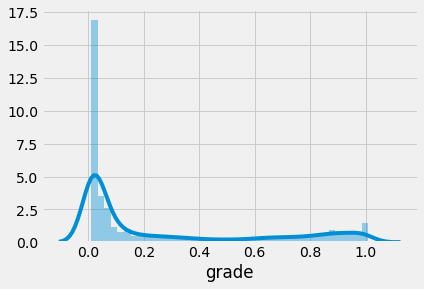

In [57]:
sns.distplot(has_grade_events['grade'])

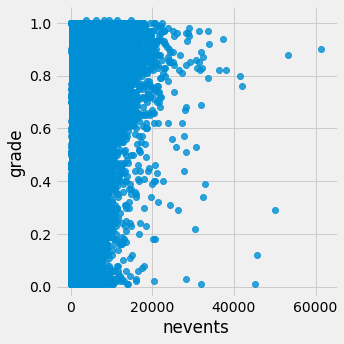

In [62]:
sns.lmplot(x='nevents', y='grade', data=has_grade_events, fit_reg=False)

In [67]:
from scipy.stats import pearsonr

pearsonr(has_grade_events['nevents'], has_grade_events['grade'])

(0.59334464601268633, 0.0)